In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
%matplotlib inline
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [3]:
import numpy as np
def k_means(X, k=3):
    index_list = np.arange(len(X))
    np.random.shuffle(index_list)
    centroids_index = index_list[:k]
    centroids = X[centroids_index]
    y = np.arange(len(X))
    while True:
        y_new = np.arange(len(X))
        for i, xi in enumerate(X):
            y_new[i] = np.argmin([np.linalg.norm(xi - cj) for cj in centroids])
        if sum(y != y_new) == 0:
            break
        for j in range(k):
            centroids[j] = np.mean(X[np.where(y_new == j)], axis=0)
        y = y_new.copy()
    return y

In [4]:
def evaluate(y, t):
    a, b, c, d = [0 for i in range(4)]
    for i in range(len(y)):
        for j in range(i+1, len(y)):
            if y[i] == y[j] and t[i] == t[j]:
                a += 1
            elif y[i] == y[j] and t[i] != t[j]:
                b += 1
            elif y[i] != y[j] and t[i] == t[j]:
                c += 1
            elif y[i] != y[j] and t[i] != t[j]:
                d += 1
    return a, b, c, d

def external_index(a, b, c, d, m):
    JC = a / (a + b + c)
    FMI = np.sqrt(a**2 / ((a + b) * (a + c)))
    RI = 2 * ( a + d ) / ( m * (m + 1) )
    return JC, FMI, RI

def evaluate_it(y, t):
    a, b, c, d = evaluate(y, t)
    return external_index(a, b, c, d, len(y))

In [6]:
test_y = k_means(iris.data)

In [7]:
evaluate_it(iris.target, test_y)

(0.47681468130427657, 0.6570146183189137, 0.704812362030905)

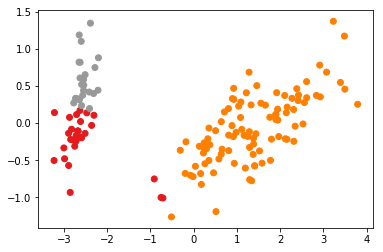

In [8]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X_reduced = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=test_y, cmap=plt.cm.Set1)

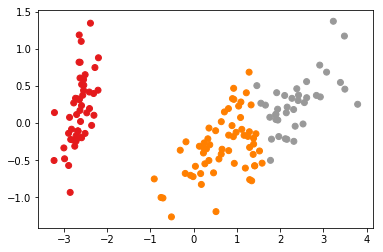

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(iris.data)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap=plt.cm.Set1)